In [1]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___
Enter Team Member Names here (double click to edit):

- Name 1:
- Name 2:
- Name 3:

________

# In Class Assignment Three
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook)  before the end of class.

<a id="top"></a>
## Contents
* <a href="#Loading">Loading the Data</a>
* <a href="#distance">Measuring Distances</a>
* <a href="#KNN">K-Nearest Neighbors</a>
* <a href="#naive">Naive Bayes</a>

________________________________________________________________________________________________________
<a id="Loading"></a>
<a href="#top">Back to Top</a>
## Downloading the Document Data
Please run the following code to read in the "20 newsgroups" dataset from sklearn's data loading module.

In [3]:
from sklearn.datasets import fetch_20newsgroups_vectorized
import numpy as np
#from __future__ import print_function

# this takes about 30 seconds to compute, read the next section while this downloads
ds = fetch_20newsgroups_vectorized(subset='train')

# this holds the continuous feature data (which is tfidf)
print('features shape:', ds.data.shape) # there are ~11000 instances and ~130k features per instance
print('target shape:', ds.target.shape) 
print('range of target:', np.min(ds.target),np.max(ds.target))
print('Data type is', type(ds.data), float(ds.data.nnz)/(ds.data.shape[0]*ds.data.shape[1])*100, '% of the data is non-zero')

features shape: (11314, 130107)
target shape: (11314,)
range of target: 0 19
Data type is <class 'scipy.sparse.csr.csr_matrix'> 0.1214353154362896 % of the data is non-zero


## Understanding the Dataset
Look at the description for the 20 newsgroups dataset at http://qwone.com/~jason/20Newsgroups/. You have just downloaded the "vectorized" version of the dataset, which means all the words inside the articles have gone through a transformation that binned them into 130 thousand features related to the words in them.  

**Question Set 1**:
- How many instances are in the dataset? 
- What does each instance represent? 
- How many classes are in the dataset and what does each class represent?
- Would you expect a classifier trained on this data would generalize to documents written in the past week? Why or why not?
- Is the data represented as a sparse or dense matrix?

___
Enter your answer here:

*Double click to edit*





___
<a id="distance"></a>
<a href="#top">Back to Top</a>
## Measures of Distance
In the following block of code, we isolate three instances from the dataset. The instance "`a`" is from the group *computer graphics*, "`b`" is from from the group *recreation autos*, and "`c`" is from group *recreation motorcycle*. **Exercise for part 2**: Calculate the: 
- (1) Euclidean distance
- (2) Cosine distance 
- (3) Jaccard similarity 

between each pair of instances using the imported functions below. Remember that the Jaccard similarity is only for binary valued vectors, so convert vectors to binary using a threshold. 

**Question for part 2**: Which distance seems more appropriate to use for this data? **Why**?

In [4]:
from scipy.spatial.distance import cosine
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import jaccard
import numpy as np

# get first instance (comp)
idx = 550
a = ds.data[idx].todense()
a_class = ds.target_names[ds.target[idx]]
print('Instance A is from class', a_class)

# get second instance (autos)
idx = 4000
b = ds.data[idx].todense()
b_class = ds.target_names[ds.target[idx]]
print('Instance B is from class', b_class)

# get third instance (motorcycle)
idx = 7000
c = ds.data[idx].todense()
c_class = ds.target_names[ds.target[idx]]
print('Instance C is from class', c_class)

# Enter distance comparison below for each pair of vectors:
p = 'Placeholder'
print('\n\nEuclidean Distance\n ab:', p, 'ac:', p, 'bc:',p)
print('Cosine Distance\n ab:', p, 'ac:', p, 'bc:', p)
print('Jaccard Dissimilarity (vectors should be boolean values)\n ab:', p, 'ac:', p, 'bc:', p)

print('\n\nThe most appropriate distance is...')
print(p)

Instance A is from class comp.graphics
Instance B is from class rec.autos
Instance C is from class rec.motorcycles


Euclidean Distance
 ab: Placeholder ac: Placeholder bc: Placeholder
Cosine Distance
 ab: Placeholder ac: Placeholder bc: Placeholder
Jaccard Dissimilarity (vectors should be boolean values)
 ab: Placeholder ac: Placeholder bc: Placeholder


The most appropriate distance is...
Placeholder


___
# Start of Live Session Assignment
___
<a id="KNN"></a>
<a href="#top">Back to Top</a>
## Using scikit-learn with KNN
Now let's use stratified cross validation with a holdout set to train a KNN model in `scikit-learn`. Use the example below to train a KNN classifier. The documentation for `KNeighborsClassifier` is here: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html  

**Exercise for part 3**: Use the code below to test what value of `n_neighbors` works best for the given data. *Note: do NOT change the metric to be anything other than `'euclidean'`. Other distance functions are not optimized for the amount of data we are working with.* 

**Question for part 3**: What is the accuracy of the best classifier you can create for this data (by changing only the `n_neighbors` parameter)? 

In [23]:
#from sklearn.cross_validation import StratifiedShuffleSplit
#from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from IPython.html import widgets 

#cv = StratifiedShuffleSplit(ds.target, n_iter = 1, test_size = 0.5, train_size=0.5)
cv = StratifiedShuffleSplit(n_splits=1, test_size = 0.5, train_size=0.5)
print(cv)

# fill in the training and testing data and save as separate variables
for num, (trainidx, testidx) in enumerate(cv.split(ds.data,ds.target)):
    # note that these are sparse matrices
    X_train = ds.data[trainidx] 
    X_test = ds.data[testidx] 
    y_train = ds.target[trainidx]
    y_test = ds.target[testidx]

# fill in your code  here to train and test
# calculate the accuracy and print it for various values of K
K = 5 

num_k = 10
acc_list = []

for i in range(10):
    K = i+1
    print("K = {}".format(K))
    clf = KNeighborsClassifier(n_neighbors=K, weights='uniform', metric='euclidean')
    clf.fit(X_train,y_train)
    y_hat = clf.predict(X_test)
    acc = sum(y_hat == y_test) / len(y_test)
    print("Accuracy: {}".format(acc))
    acc_list.append(acc)
    


StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.5,
            train_size=0.5)
K = 1
Accuracy: 0.5981969241647517
K = 2
Accuracy: 0.5235990807848683
K = 3
Accuracy: 0.5043309174474103
K = 4
Accuracy: 0.48948205762771785
K = 5
Accuracy: 0.48064345059218666
K = 6
Accuracy: 0.47534028637086795
K = 7
Accuracy: 0.468269400742443
K = 8
Accuracy: 0.462612692239703
K = 9
Accuracy: 0.4550114901891462
K = 10
Accuracy: 0.44829414884214247


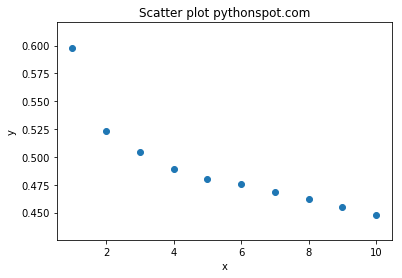

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(range(1,11), acc_list)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
print (acc_list)        
 
# acc = 0.2 # overwrite this with the actual accuracy

#=====================================

print('Accuracy of classifier with %d neighbors is: %.2f'%(K,acc))


The best accuracy is XX with XX neighbors.

**Question for part 3**: With sparse data, does the use of a KDTree representation make sense? Why or Why not?

Enter your answer below:

*Double Click to edit*
___

_____
## KNN extensions - Centroids
Now lets look at a very closely related classifier to KNN, called nearest centroid. In this classifier (which is more appropriate for big data scenarios and sparse data), the training step is used to calculate the centroids for each class. These centroids are saved. Unknown attributes, at prediction time, only need to have distances calculated for each saved centroid, drastically decreasing the time required for a prediction. 

**Exercise for part 4**: Use the template code below to create a nearest centroid classifier. Test which metric has the best cross validated performance: Euclidean, Cosine, or Manhattan. In `scikit-learn` you can see the documentation for NearestCentroid here: 
- http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html#sklearn.neighbors.NearestCentroid

and for supported distance metrics here:
- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics

In [31]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

# the parameters for the nearest centroid metric to test are:
#    l1, l2, and cosine (all are optimized)
clf = NearestCentroid(metric='euclidean')

# fill in your code here


print('The best distance metric is: ', p)

The best distance metric is:  Placeholder


___
<a id="naive"></a>
<a href="#top">Back to Top</a>
## Naive Bayes Classification
Now let's look at the use of the Naive Bayes classifier. The 20 newsgroups dataset has 20 classes and about 130,000 features per instance. Recall that the Naive Bayes classifer calculates a posterior distribution for each possible class. Each posterior distribution is a multiplication of many conditional distributions: 

$${\arg \max}_{j} \left(p(class=j)\prod_{i} p(attribute=i|class=j) \right)$$

where $p(class=j)$ is the prior and $p(attribute=i|class=j)$ is the conditional probability.

**Question for part 5**: With this many classes and features, how many different conditional probabilities need to be parameterized? How many priors need to be parameterized?

Enter you answer here:

*Double Click to edit*


In [15]:
# Use this space for any calculations you might want to do


___
## Naive Bayes in Scikit-learn
Scikit has several implementations of the Naive Bayes classifier: `GaussianNB`, `MultinomialNB`, and `BernoulliNB`. Look at the documentation here: http://scikit-learn.org/stable/modules/naive_bayes.html Take a look at each implementation and then answer this question: 

**Questions for part 6**: 
- If the instances contain mostly continuous attributes, would it be better to use Gaussian Naive Bayes, Multinomial Naive Bayes, or Bernoulli? And Why? 
- What if the data is sparse, does this change your answer? Why or Why not?

Enter you answer here:

*Double Click to edit*

___

## Naive Bayes Comparison
For the final section of this notebook let's compare the performance of Naive Bayes for document classification. Look at the parameters for `MultinomialNB`, and `BernoulliNB` (especially `alpha` and `binarize`). 

**Exercise for part 7**: Using the example code below, change the parameters for each classifier and see how accurate you can make the classifiers on the test set. 

**Question for part 7**: Why are these implementations so fast to train? What does the `'alpha'` value control in these models (*i.e.*, how does it change the parameterizations)? 

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB


clf_mnb = MultinomialNB(alpha=1.0)
clf_bnb = BernoulliNB(alpha=1.0, binarize=0.0)

# fill in your code here

            
print('These classifiers are so fast because...', p)
print('The alpha values control...', p)


These classifiers are so fast because... Placeholder
The alpha values control... Placeholder


________________________________________________________________________________________________________

That's all! Please **upload your rendered notebook to blackboard** and please include **team member names** in the notebook submission.